# Semantic Spaces

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy.linalg as la
import matplotlib.pyplot as plt

{'text9': 11, 'txt': 12, 'text8': 10, 'text6': 8, 'text7': 9, 'text5': 7, 'text4': 6, 'text12': 3, 'text1': 0, 'text11': 2, 'text3': 5, 'text2': 4, 'text10': 1}
['text1', 'text10', 'text11', 'text12', 'text2', 'text3', 'text4', 'text5', 'text6', 'text7', 'text8', 'text9', 'txt']


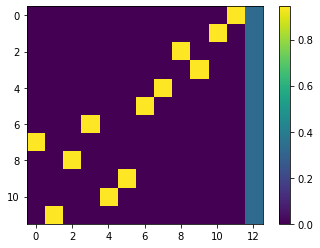

In [2]:
n_features = 2000
t_v2 = TfidfVectorizer( max_features=n_features,
                                   stop_words='english', sublinear_tf=True)
import os
directory = './docs/'
flist = [fname for fname in os.listdir(directory)]
books = t_v2.fit_transform(flist)
books.shape
books_d=books.todense()
plt.imshow(books_d)
plt.colorbar(); plt.savefig("./images/books_matrix.png");
print(t_v2.vocabulary_)
print(t_v2.get_feature_names())

In [3]:
print(books_d.round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33]]


In [4]:
U, sig, V = la.svd(books_d)
print(sig)

[1.47971049 0.94438325 0.94438325 0.94438325 0.94438325 0.94438325
 0.94438325 0.94438325 0.94438325 0.94438325 0.94438325 0.94438325]


In [5]:
strings = ["Human machine interface for ABC computer applications",
"A survey of user opinion of computer system response time",
"The EPS user interface management system",
"System and human system engineering testing of EPS",
"Relation of user perceived response time to error measurement",
"The generation of random, binary, ordered trees",
"The intersection graph of paths in trees",
"Graph minors IV: Widths of trees and well-quasi-ordering",
"Graph minors: A survey"]
string_short = ["m1","m2", "m3", "m4", "m5", "g1", "g2", 'g3', "g4"]

{'human': 3, 'interface': 4, 'computer': 0, 'survey': 8, 'user': 11, 'response': 7, 'time': 9, 'eps': 1, 'perceived': 6, 'trees': 10, 'graph': 2, 'minors': 5}
['computer', 'eps', 'graph', 'human', 'interface', 'minors', 'perceived', 'response', 'survey', 'time', 'trees', 'user']


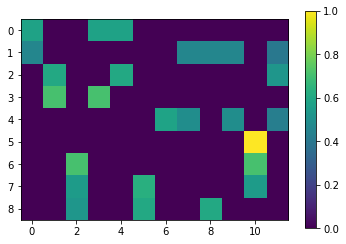

In [21]:
t_v3 = TfidfVectorizer( max_features=12,
                                   stop_words='english', sublinear_tf=True)

titles = t_v3.fit_transform(strings)
titles_d=titles.todense()
plt.imshow(titles_d)
plt.colorbar(); plt.savefig("./images/books_matrix.png");
print(t_v3.vocabulary_)
print(t_v3.get_feature_names())

In [22]:
print(titles_d.round(2))

[[0.58 0.   0.   0.58 0.58 0.   0.   0.   0.   0.   0.   0.  ]
 [0.46 0.   0.   0.   0.   0.   0.   0.46 0.46 0.46 0.   0.4 ]
 [0.   0.6  0.   0.   0.6  0.   0.   0.   0.   0.   0.   0.52]
 [0.   0.71 0.   0.71 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.58 0.49 0.   0.49 0.   0.43]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.71 0.   0.   0.   0.   0.   0.   0.   0.71 0.  ]
 [0.   0.   0.55 0.   0.   0.63 0.   0.   0.   0.   0.55 0.  ]
 [0.   0.   0.52 0.   0.   0.6  0.   0.   0.6  0.   0.   0.  ]]


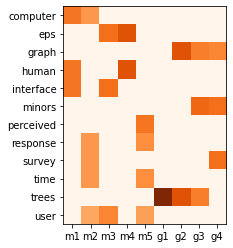

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(titles_d.T, cmap=plt.cm.Oranges)

# We want to show all ticks...
ax.set_yticks(np.arange(len(t_v3.get_feature_names())))
ax.set_xticks(np.arange(len(strings)))
# ... and label them with the respective list entries
ax.set_yticklabels(t_v3.get_feature_names());
ax.set_xticklabels(string_short); plt.savefig("./images/titles_matrix.png", bbox_inches='tight');

In [24]:
def bmatrix(a):
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

print(bmatrix(titles_d.round(2).T))

\begin{bmatrix}
  0.58 & 0.46 & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0.6 & 0.71 & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0.71 & 0.55 & 0.52\\
  0.58 & 0. & 0. & 0.71 & 0. & 0. & 0. & 0. & 0.\\
  0.58 & 0. & 0.6 & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.63 & 0.6\\
  0. & 0. & 0. & 0. & 0.58 & 0. & 0. & 0. & 0.\\
  0. & 0.46 & 0. & 0. & 0.49 & 0. & 0. & 0. & 0.\\
  0. & 0.46 & 0. & 0. & 0. & 0. & 0. & 0. & 0.6\\
  0. & 0.46 & 0. & 0. & 0.49 & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 1. & 0.71 & 0.55 & 0.\\
  0. & 0.4 & 0.52 & 0. & 0.43 & 0. & 0. & 0. & 0.\\
\end{bmatrix}


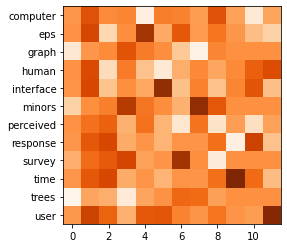

In [44]:
U, sig, V = la.svd(titles_d.T)
fig, ax = plt.subplots()
nwords = len(t_v3.get_feature_names())
nstrings = len(strings)
im = ax.imshow(U, cmap=plt.cm.Oranges)
ax.set_yticks(np.arange(nwords))
ax.set_yticklabels(t_v3.get_feature_names());
plt.savefig("./images/U_matrix.png", bbox_inches='tight');

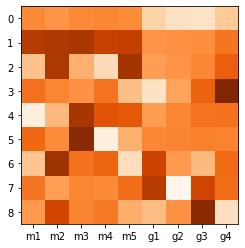

In [45]:
fig, ax = plt.subplots()
im = ax.imshow(V, cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(nstrings))
ax.set_xticklabels(string_short);
plt.savefig("./images/V_matrix.png", bbox_inches='tight');

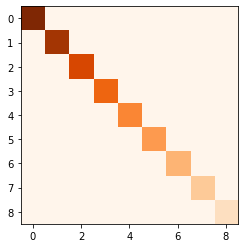

In [46]:
rank = len(strings)
sigma = np.zeros((rank, rank))
for i in range(rank):
    sigma[i][i] = sig[i]
fig, ax = plt.subplots()
im = ax.imshow(sigma, cmap=plt.cm.Oranges)

plt.savefig("./images/sigma_matrix.png", bbox_inches='tight');

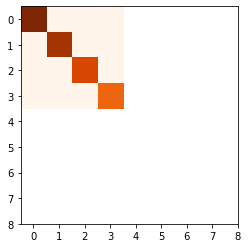

In [50]:
r = 4
sigma_r = np.zeros((r, r))
for i in range(r):
    sigma_r[i][i] = sig[i]
fig, ax = plt.subplots()
im = ax.imshow(sigma_r, cmap=plt.cm.Oranges)
# We want to show all ticks...
ax.set_yticks(np.arange(nstrings))
ax.set_xticks(np.arange(nstrings))
plt.savefig("./images/sigma_r_matrix.png", bbox_inches='tight');

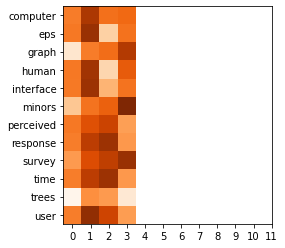

In [53]:
fig, ax = plt.subplots()
im = ax.imshow(U[:,:r], cmap=plt.cm.Oranges)
U_r = U[:,:r]
ax.set_yticks(np.arange(nwords))
ax.set_xticks(np.arange(nwords))
ax.set_yticklabels(t_v3.get_feature_names());
plt.savefig("./images/U_r_matrix.png", bbox_inches='tight');

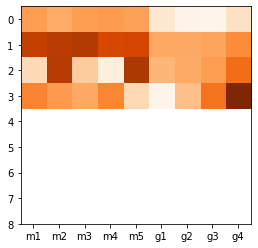

In [54]:
V_r = V[:r,:]
fig, ax = plt.subplots()
im = ax.imshow(V[:4,:], cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(nstrings))
ax.set_yticks(np.arange(nstrings))
ax.set_xticklabels(string_short);
plt.savefig("./images/V_r_matrix.png", bbox_inches='tight');

## What are these concepts?

We can use the 'U' matrix to show us what words represent which concepts

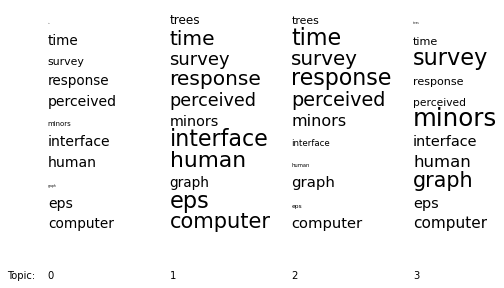

In [86]:
# need pos U_r
posU_r = U_r - np.min(U_r)
plt.figure(figsize=(8,5))
plt.axis([-1, 10,-1,15])
plt.annotate('Topic:', (-1, -1))
for i in range(r):
    plt.annotate(str(i), (i*3,-1))
    for j in range(nwords):
#         print(i, j, t_v3.get_feature_names()[j], U_r[j,i])
    
        plt.annotate(t_v3.get_feature_names()[j], (i*3,2+1.2*j), size=20*posU_r[j,i])
plt.axis('off')
plt.savefig('concept_words.png')
plt.show();

Not necessarily very meaningful

In [16]:
def cos_sim(x,y):
    xf = np.ravel(x)
    yf = np.ravel(y)
    sim = np.dot(xf,yf)/(np.sqrt(sum(xf**2))*np.sqrt(sum(yf**2)))
    return sim

#['computer', 'eps', 'graph', 'human', 'interface', 'minors', 'perceived', 'response', 'survey', 'time', 'trees', 'user']
print("graph vs tree", cos_sim(U_r[2,:], U_r[10,:]))
print("human vs user", cos_sim(U_r[3,:], U_r[11,:]))
print("graph vs minor", cos_sim(U_r[2,:], U_r[5,:]))
print("human vs interface", cos_sim(U_r[3,:], U_r[4,:]))

graph vs tree 0.3504019113046441
human vs user 0.11452249197177984
graph vs minor 0.9028829871966637
human vs interface 0.9521816798157577


In [17]:
print("m1 vs m3", cos_sim(V_r[:,0], V_r[:,2]))
print("g1 vs g2", cos_sim(V_r[:,5], V_r[:,6]))
print("m4 vs g1", cos_sim(V_r[:,4], V_r[:,5]))

m1 vs m3 0.9352702052865914
g1 vs g2 0.8344678296253983
m4 vs g1 0.18185647706860067


# For visualisation use 2d vectors

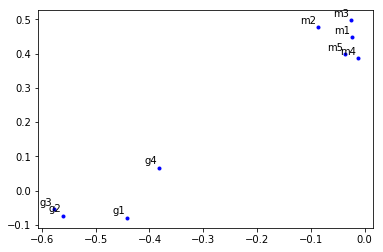

In [18]:
r = 2
V_r = V[:r,:]
U_r = U[:,:r]

#in document space
plt.plot(V_r[0, :], V_r[1, :], 'b.')
for i in range(9):
    label = string_short[i]
    x = V_r[0, i]
    y = V_r[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/doc_space.eps", bbox_inches='tight');

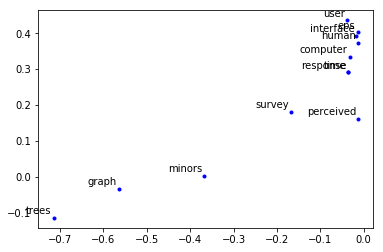

In [19]:
#in term space
plt.plot(U_r[:, 0], U_r[:, 1], 'b.')
for i in range(len(t_v3.get_feature_names())):
    label = t_v3.get_feature_names()[i]
    x = U_r[i, 0]
    y = U_r[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_space.eps", bbox_inches='tight');

# Machine Translation

In [149]:
vocab_size = 2000
#data downloaded from https://ddd.uab.cat/record/238990?ln=en
file_fr = 'cadlaws_french.txt'
file_en = 'cadlaws_english.txt'
from nltk.tokenize import sent_tokenize, word_tokenize

txt=[]
doc_limit = 100
with open(file_fr) as f:
    i=0
    for line in f:
        txt.append(line)
        i+=1
        if i==doc_limit:
            break
with open(file_en) as f:
    i = 0
    for line in f:
        txt[i] = txt[i] + ' ' + line
        i+=1
        if i==doc_limit:
            break
#         print(txt[i])
#         break

from nltk.corpus import stopwords
# need to comment this in below on first run
# import nltk
# nltk.download('stopwords')
final_stopwords_list = stopwords.words('english') + stopwords.words('french')
tv5 = TfidfVectorizer(max_features=vocab_size, stop_words=final_stopwords_list)

In [150]:
laws = tv5.fit_transform(txt)
laws

<100x357 sparse matrix of type '<class 'numpy.float64'>'
	with 686 stored elements in Compressed Sparse Row format>

In [151]:
print(tv5.vocabulary_)
print(tv5.get_feature_names())

{'règlement': 291, 'établi': 355, 'conformément': 70, 'loi': 176, 'pension': 227, 'retraite': 284, 'gendarmerie': 141, 'royale': 290, 'canada': 51, 'regulations': 268, 'made': 179, 'pursuant': 257, 'royal': 289, 'canadian': 52, 'mounted': 199, 'police': 242, 'superannuation': 315, 'act': 11, 'titre': 327, 'abrégé': 5, 'short': 305, 'title': 326, 'interprétation': 163, 'interpretation': 162, 'membres': 188, 'members': 186, 'force': 132, 'service': 304, 'temps': 322, 'partiel': 220, 'part': 219, 'time': 325, 'nombre': 203, 'heures': 147, 'semaine': 303, 'number': 206, 'hours': 148, 'per': 230, 'week': 345, 'moyenne': 200, 'hebdomadaire': 146, 'travail': 333, 'weekly': 346, 'average': 44, 'work': 348, 'solde': 306, 'membre': 187, 'pay': 221, 'member': 185, 'droit': 96, 'choisir': 63, 'payer': 223, 'égard': 352, 'fraction': 137, 'période': 259, 'right': 288, 'elect': 108, 'period': 231, 'accompagné': 7, 'option': 210, 'costing': 78, 'elective': 111, 'forces': 133, 'canadiennes': 53, 'fonct

In [152]:
Uf, sigf, Vf = la.svd(laws.todense().T)

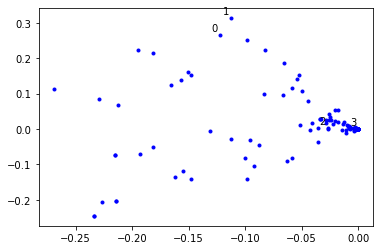

In [153]:
r = 2
V_rf = Vf[:r,:]
U_rf = Uf[:,:r]

#in document space
plt.plot(V_rf[0, :], V_rf[1, :], 'b.')
for i in range(4):
    label = str(i)
    x = V_rf[0, i]
    y = V_rf[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/doc_ef_space.eps", bbox_inches='tight');

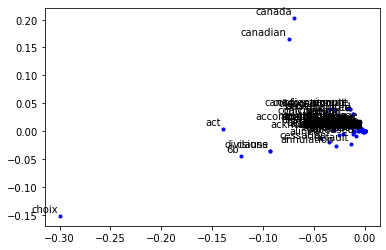

In [154]:
#in term space
limit = 100
plt.plot(U_rf[:limit, 0], U_rf[:limit, 1], 'b.')
for i in range(limit):
    label = tv5.get_feature_names()[i]
    x = U_rf[i, 0]
    y = U_rf[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_ef_space.eps", bbox_inches='tight');

# cosine similarities

In [219]:
n_concepts=20
i = 62
j=116
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:,i], Uf[:,j]))
print(f'with only rank {n_concepts} approximation')
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:n_concepts,i], Uf[:n_concepts,j]))

children vs enfants -1.3227266504323148e-17
with only rank 20 approximation
children vs enfants -0.14601982735497263


In [221]:
i = 114
j=115
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:,i], Uf[:,j]))
print(f'with only rank {n_concepts} approximation')
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:n_concepts,i], Uf[:n_concepts,j]))

employee vs employé 1.9854452283640803e-17
with only rank 20 approximation
employee vs employé 1.0


In [222]:
i = 351
j=301
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:,i], Uf[:,j]))
print(f'with only rank {n_concepts} approximation')
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:n_concepts,i], Uf[:n_concepts,j]))

école vs school 8.047342394507888e-19
with only rank 20 approximation
école vs school 0.9999932249594163


In [245]:
i = 145
j=65
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:,i], Uf[:,j]))
print(f'with only rank {n_concepts} approximation')
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:n_concepts,i], Uf[:n_concepts,j]))

hardship vs cited -6.938893903907221e-18
with only rank 20 approximation
hardship vs cited 0.009388349174985948


In [247]:
i = 82
j=81
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:,i], Uf[:,j]))
print(f'with only rank {n_concepts} approximation')
print(f"{tv5.get_feature_names()[i]} vs {tv5.get_feature_names()[j]}", cos_sim(Uf[:n_concepts,i], Uf[:n_concepts,j]))

dates vs criminels -2.207435623180486e-16
with only rank 20 approximation
dates vs criminels 0.6277975676153154


# short example

In [20]:
command = ["What is the time",
         "What is the day",
         "What time is the meeting",
         "Cancel the meeting"]
command_names = ["s1","s2", "s3", "s4"]

{'what': 6, 'is': 2, 'the': 4, 'time': 5, 'day': 1, 'meeting': 3, 'cancel': 0}
['cancel', 'day', 'is', 'meeting', 'the', 'time', 'what']


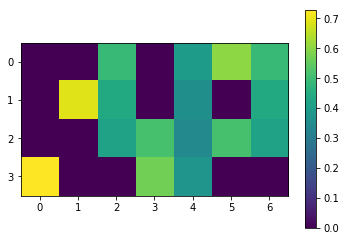

In [21]:
vocab_size = 7
t_v4 = TfidfVectorizer(max_features=vocab_size)

coms = t_v4.fit_transform(command)
coms_d=coms.todense()
plt.imshow(coms_d)
plt.colorbar(); plt.savefig("./images/coms_matrix.png");
print(t_v4.vocabulary_)
print(t_v4.get_feature_names())

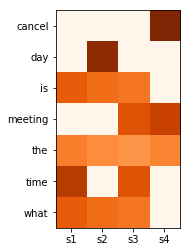

In [22]:
fig, ax = plt.subplots()
im = ax.imshow(coms_d.T, cmap=plt.cm.Oranges)
ax.set_yticks(np.arange(len(t_v4.get_feature_names())))
ax.set_xticks(np.arange(len(command)))
ax.set_yticklabels(t_v4.get_feature_names());
ax.set_xticklabels(command_names); plt.savefig("./images/coms_matrix.png", bbox_inches='tight');

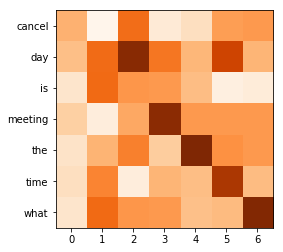

In [23]:
Uc, sigc, Vc = la.svd(coms_d.T)
fig, ax = plt.subplots()
im = ax.imshow(Uc, cmap=plt.cm.Oranges)

ax.set_yticks(np.arange(len(t_v4.get_feature_names())))
ax.set_yticklabels(t_v4.get_feature_names());
plt.savefig("./images/Uc_matrix.png", bbox_inches='tight');

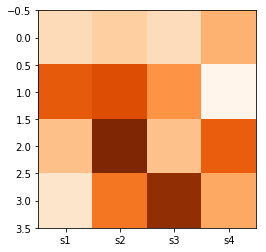

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(Vc, cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(len(command_names)))
ax.set_xticklabels(command_names);
plt.savefig("./images/Vn_matrix.png", bbox_inches='tight');

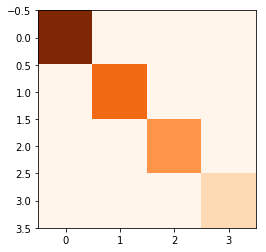

In [25]:
rank = 4
sigmac = np.zeros((rank, rank))
for i in range(rank):
    sigmac[i][i] = sigc[i]
fig, ax = plt.subplots()
im = ax.imshow(sigmac, cmap=plt.cm.Oranges)
plt.savefig("./images/sigmac_matrix.png", bbox_inches='tight');

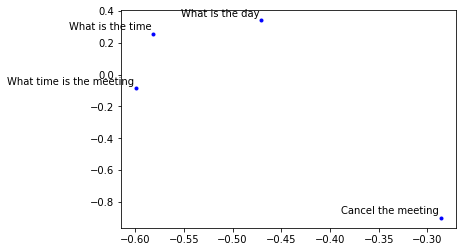

In [26]:
r = 2
V_r = Vc[:r,:]
U_r = Uc[:,:r]

#in document space
plt.plot(V_r[0, :], V_r[1, :], 'b.')
for i in range(4):
    label = command[i]
    x = V_r[0, i]
    y = V_r[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/doc_c_space.eps", bbox_inches='tight');

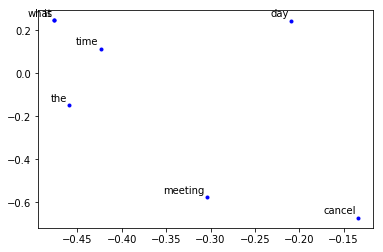

In [27]:
#in term space
plt.plot(U_r[:, 0], U_r[:, 1], 'b.')
for i in range(len(t_v4.get_feature_names())):
    label = t_v4.get_feature_names()[i]
    x = U_r[i, 0]
    y = U_r[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_c_space.eps", bbox_inches='tight');

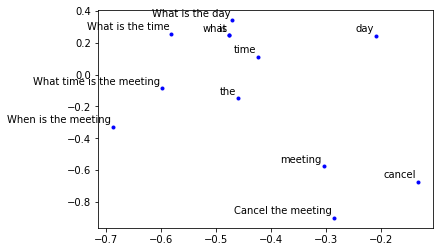

In [28]:
V_r = Vc[:r,:]
U_r = Uc[:,:r]
c_new = ["When is the meeting"]
c_pn = t_v4.transform(c_new).todense()
V_new = np.dot(c_pn, Uc)[:,:r] #project new data in to semantic space
C = np.concatenate([V_r, U_r.T, V_new.T], axis=1)
plt.plot(C[0, :], C[1, :], 'b.')
labs = command+t_v4.get_feature_names()+["When is the meeting"]
for i in range(len(labs)):
    label = labs[i]
    x =C[0, i]
    y =C[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/both_c_space.eps", bbox_inches='tight');

# news group example

In [211]:
n_samples = 1000
n_features = 2000
n_concepts = 10
# n_top_words = 20
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]

In [199]:
t_v1 = TfidfVectorizer(max_features=n_features,
                                   stop_words='english')
news = t_v1.fit_transform(data_samples)
news

<1000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 34236 stored elements in Compressed Sparse Row format>

In [200]:
# Use tf-idf features


print(t_v1.vocabulary_)
print(t_v1.get_feature_names())

{'sure': 1764, 'story': 1733, 'did': 527, 'disagree': 539, 'statement': 1718, 'media': 1108, 'pro': 1386, 'israeli': 929, 'world': 1976, 'having': 821, 'lived': 1037, 'europe': 621, 'realize': 1455, 'described': 509, 'letter': 1012, 'try': 1862, 'ignore': 873, 'degree': 504, 'think': 1812, 'reason': 1458, 'report': 1501, 'clearly': 370, 'daily': 471, 'reports': 1503, 'acts': 102, 'soldiers': 1666, 'received': 1464, 'government': 782, 'makes': 1076, 'away': 212, 'look': 1046, 'jews': 940, 'got': 779, 'power': 1359, 'yeah': 1992, 'expect': 639, 'people': 1299, 'read': 1448, 'faq': 667, 'actually': 104, 'accept': 87, 'hard': 814, 'atheism': 194, 'need': 1196, 'little': 1035, 'faith': 661, 'logic': 1043, 'runs': 1552, 'jim': 942, 'sorry': 1673, 'feelings': 682, 'oh': 1237, 'just': 952, 'end': 603, 'maybe': 1102, 'start': 1710, 'new': 1202, 'newsgroup': 1204, 'alt': 131, 'atheist': 195, 'won': 1966, 'big': 240, 'don': 559, 'forget': 723, 'iii': 875, 'points': 1335, 'like': 1021, 'know': 972

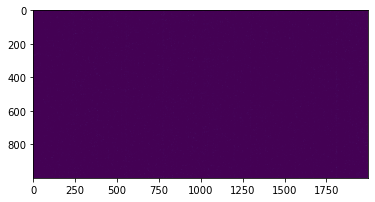

In [201]:
news_d=news.todense()
plt.imshow(news_d); plt.savefig("./images/news_matrix.png");

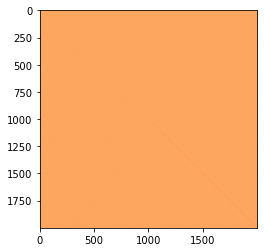

In [202]:
Un, sign, Vn = la.svd(news_d.T)
fig, ax = plt.subplots()
im = ax.imshow(Un, cmap=plt.cm.Oranges)

plt.savefig("./images/Un_matrix.png", bbox_inches='tight');

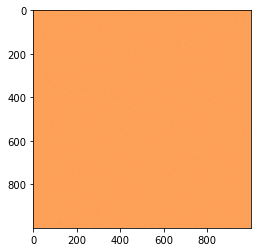

In [203]:
fig, ax = plt.subplots()
im = ax.imshow(Vn, cmap=plt.cm.Oranges)

plt.savefig("./images/Vn_matrix.png", bbox_inches='tight');

In [204]:
rank = n_features
sigman = np.zeros((rank, rank))
for i in range(rank):
    sigman[i][i] = sign[i]
fig, ax = plt.subplots()
im = ax.imshow(sigman, cmap=plt.cm.Oranges)

plt.savefig("./images/sigman_matrix.png", bbox_inches='tight');

IndexError: index 1000 is out of bounds for axis 0 with size 1000

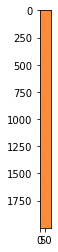

In [205]:
r = 100
fig, ax = plt.subplots()
im = ax.imshow(Un[:,:r], cmap=plt.cm.Oranges)
U_nr = Un[:,:r]

plt.savefig("./images/U_nr_matrix.png", bbox_inches='tight');

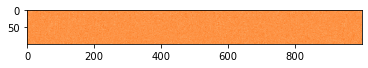

In [206]:
fig, ax = plt.subplots()
im = ax.imshow(Vn[:r,:], cmap=plt.cm.Oranges)
V_nr = Vn[:,:r]

plt.savefig("./images/V_nr_matrix.png", bbox_inches='tight');

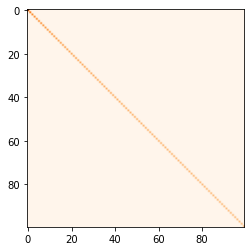

In [207]:
sigma_nr = np.zeros((r, r))
for i in range(r):
    sigma_nr[i][i] = sign[i]
fig, ax = plt.subplots()
im = ax.imshow(sigma_nr, cmap=plt.cm.Oranges)

plt.savefig("./images/sigma_nr_matrix.png", bbox_inches='tight');

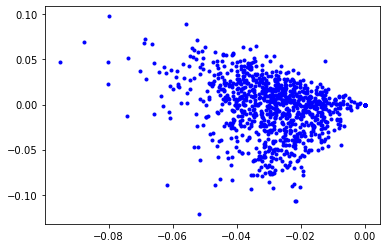

In [208]:
r = 2
V_r = Vn[:r,:]
U_r = Un[:,:r]

#in document space
plt.plot(V_r[0, :], V_r[1, :], 'b.')

plt.savefig("./images/doc_n_space.eps", bbox_inches='tight');

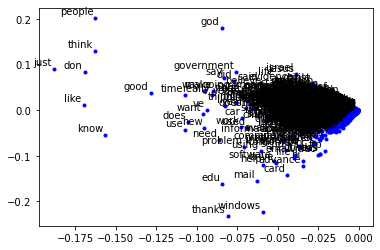

In [209]:
#in term space
plt.plot(U_r[:, 0], U_r[:, 1], 'b.')
for i in range(len(t_v1.get_feature_names())):
    label = t_v1.get_feature_names()[i]
    x = U_r[i, 0]
    y = U_r[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_n_space.eps", bbox_inches='tight');

In [242]:
i = 1021
j = 1056
print(f"{t_v1.get_feature_names()[i]} vs {t_v1.get_feature_names()[j]}", cos_sim(Un[:n_concepts,i], Un[:n_concepts,j]))

like vs love 0.372261664435121


In [25]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from PIL import Image
import cv2
import os

# Sample text data (keywords for images)
documents = [
    "sunset sky orange evening",
    "beach sand ocean water",
]

# Step 1: Convert Text Data into a Document-Term Matrix (DTM)
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(documents)

# Step 2: Extract Image Features (e.g., Color Histogram)
def extract_image_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image")
    else:
        print("Image loaded successfully")  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    histogram = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    histogram = histogram.flatten()  # Flatten the 3D histogram to 1D
    histogram = normalize(histogram.reshape(1, -1))  # Normalize to unit vector
    return histogram

# Example images (these would be actual image paths in your case)
image_paths = ["images/sunset_image.jpg", "images/beach_image.jpg"]

# Extracting features for images (simulated with dummy files for this example)
image_features = np.array([extract_image_features(path) for path in image_paths]).reshape(len(image_paths), -1)

# Step 3: Combine the Text Data (DTM) and Image Features
combined_features = np.hstack([dtm.toarray(), image_features])  # Horizontal stack (concatenate)

# Step 4: Apply Singular Value Decomposition (SVD)x
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
lsa_matrix = svd.fit_transform(combined_features)

# Display the reduced space (LSA space) for each document/image
print("LSA Reduced Space (2D):")
print(lsa_matrix)

# Simulate placing a new unannotated image (image features extraction + LSA transformation)
new_image_path = "images/new_image.jpg"
new_image_features = extract_image_features(new_image_path)
new_combined_features = np.hstack([new_image_features, np.zeros((1, dtm.shape[1]))])  # No text features for new image
new_image_lsa = svd.transform(new_combined_features)

print(f"New image placed at coordinates: {new_image_lsa}")

Image loaded successfully
Image loaded successfully
LSA Reduced Space (2D):
[[ 1.00009744 -0.99990257]
 [ 1.00007153  0.99992847]]
Image loaded successfully
New image placed at coordinates: [[0.09403594 0.03469233]]


* Unannotated images can still be projected into the shared latent space because they are represented by visual features that are embedded in the same feature space as the textual features (keywords).
* When applying SVD to the combined feature matrix (text + images), both annotated and unannotated images are mapped into a common latent space, where the unannotated images are positioned based on their visual similarity to annotated images.

* Annotated Image 1: [visual_features, text_features] → [visual_features, [sun, beach]]
* Unannotated Image 2: [visual_features, zero_text_features] → [visual_features, [0, 0, 0]]


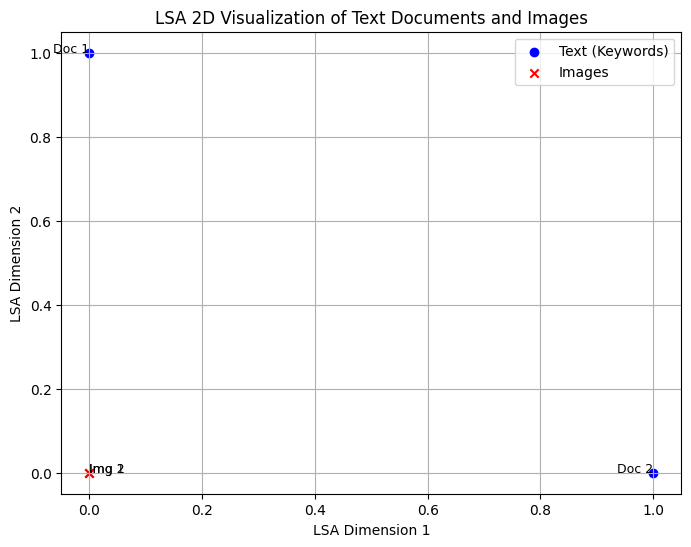

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import cv2
import os

# Sample text data (keywords for images)
documents = [
    "sunset sky orange evening",
    "beach sand ocean water"
]

# Step 1: Convert Text Data into a Document-Term Matrix (DTM)
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(documents)

# Step 2: Extract Image Features (e.g., Color Histogram)
def extract_image_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    histogram = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    histogram = histogram.flatten()  # Flatten the 3D histogram to 1D
    histogram = normalize(histogram.reshape(1, -1))  # Normalize to unit vector
    return histogram

# Example images (these would be actual image paths in your case)
image_paths = ["images/sunset_image.jpg", "images/beach_image.jpg"]

# Extracting features for images (simulated with dummy files for this example)
image_features = np.array([extract_image_features(path) for path in image_paths]).reshape(len(image_paths), -1)

# Step 3: Adjust Image Features to Match the Number of Text Features
# Ensure the number of features is the same by matching the column size of the DTM
# We can resize the image features to have the same number of features as the text data.

# Resize the image features to have the same number of columns as the DTM (i.e., match the number of words in the vocabulary)
image_features_resized = np.array([np.resize(img, dtm.shape[1]) for img in image_features])

# Step 4: Combine the Text Data (DTM) and Image Features
combined_features = np.vstack([dtm.toarray(), image_features_resized])  # Vertical stack (combine)

# Step 5: Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
lsa_matrix = svd.fit_transform(combined_features)

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot the text documents (keywords) with 'o' markers
plt.scatter(lsa_matrix[:len(documents), 0], lsa_matrix[:len(documents), 1], color='blue', label='Text (Keywords)', marker='o')

# Plot the image features with 'x' markers
plt.scatter(lsa_matrix[len(documents):, 0], lsa_matrix[len(documents):, 1], color='red', label='Images', marker='x')

# Adding labels for each point
for i, doc in enumerate(documents):
    plt.text(lsa_matrix[i, 0], lsa_matrix[i, 1], f"Doc {i+1}", fontsize=9, ha='right')

# Corrected loop for images: Label image points correctly
for i, path in enumerate(image_paths):
    # Corrected indexing: after documents, we start at len(documents) for images
    plt.text(lsa_matrix[len(documents) + i, 0], lsa_matrix[len(documents) + i, 1], f"Img {i+1}", fontsize=9, ha='left')

# Adding labels and title
plt.xlabel('LSA Dimension 1')
plt.ylabel('LSA Dimension 2')
plt.title('LSA 2D Visualization of Text Documents and Images')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

After concatenating the text and image features and applying SVD, Document 1 and Image 1 should be close to each other, because both are about a sunset. Similarly, Document 2 and Image 2 should be close to each other, as both describe a beach.
